In [2]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    # x_train, y_train, x_input are all arrays containing arrays with input values
    # k is number of nearest neighbours to be included in the voting
    #1) There is no structured method to find the best value for “K”. We need to find out with various values by trial and error and assuming that training data is unknown.
    #2) Choosing smaller values for K can be noisy and will have a higher influence on the result.
    #3) Larger values of K will have smoother decision boundaries which mean lower variance but increased bias. Also, computationally expensive.
    #4) Another way to choose K is though cross-validation. One way to select the cross-validation dataset from the training dataset. Take the small portion from the training dataset and call it a validation dataset, and then use the same to evaluate different possible values of K. This way we are going to predict the label for every instance in the validation set using with K equals to 1, K equals to 2, K equals to 3.. and then we look at what value of K gives us the best performance on the validation set and then we can take that value and use that as the final setting of our algorithm so we are minimizing the validation error .
    #5) In general, practice, choosing the value of k is k = sqrt(N) where N stands for the number of samples in your training dataset.#
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [1]:
#Importing the required modules
#Importing required modules
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from numpy.random import randint
import matplotlib.pyplot as plt
import numpy as np
 
#Loading the Data
wine= load_wine()
 
# Store features matrix in X
X= wine.data
#Store target vector in 
y= wine.target
 
 
#Creating the training Data
#train_idx = xxx = randint(0,150,100)
train_idx = randint(0,178,125)
X_train = X[train_idx]
y_train = y[train_idx]
 
#Creating the testing Data
#test_idx = xxx = randint(0,150,50) #taking 50 random samples
test_idx = randint(0,178,53)
X_test = X[test_idx]
y_test = y[test_idx]

In [3]:
y_pred = predict(X_train,y_train,X_test, int(np.round(np.sqrt(X.shape[0]))))

#Checking the accuracy
score = accuracy_score(y_test, y_pred)
score

0.8490566037735849

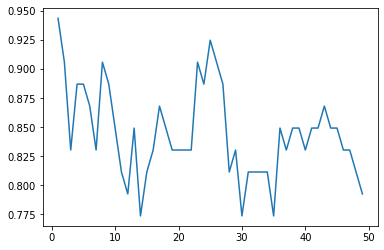

In [5]:
dct = {}
for i in range(1,50): 
    #Applying our function 
    y_pred = predict(X_train,y_train,X_test, i)
 
    #Checking the accuracy
    score = accuracy_score(y_test, y_pred)

    dct[i]=score


x = dct.keys()
y = dct.values()
plt.plot(x,y)

In [6]:
int(np.round(np.sqrt(X.shape[0])))

13

In [7]:
X.shape

(178, 13)